In [10]:
import math
#import yfinance as yf
#import pandas_datareader as web
from pandas_datareader import data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

In [60]:
# get the stocks
start_date = "2012-01-01"
end_date ="2023-12-17"
yf.pdr_override()
#df = web.DataReader('AAPL','2007-01-01', '2023-03-10')
df = web.DataReader('AAPL',start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [65]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500198,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567369,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706890,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839732,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819361,394024400


In [67]:
# for specific date data 
# get the stocks
#start_date = input("Enter start date")
#end_date = input("Enter end date")
#yf.pdr_override()
#df = web.DataReader('AAPL','2007-01-01', '2023-03-10')
#df = web.DataReader('AAPL',start_date, end_date)

Enter start date2012-01-09
Enter end date2023-02-23
[*********************100%***********************]  1 of 1 completed


In [18]:
df.shape

(4064, 6)

<Figure size 1600x900 with 0 Axes>

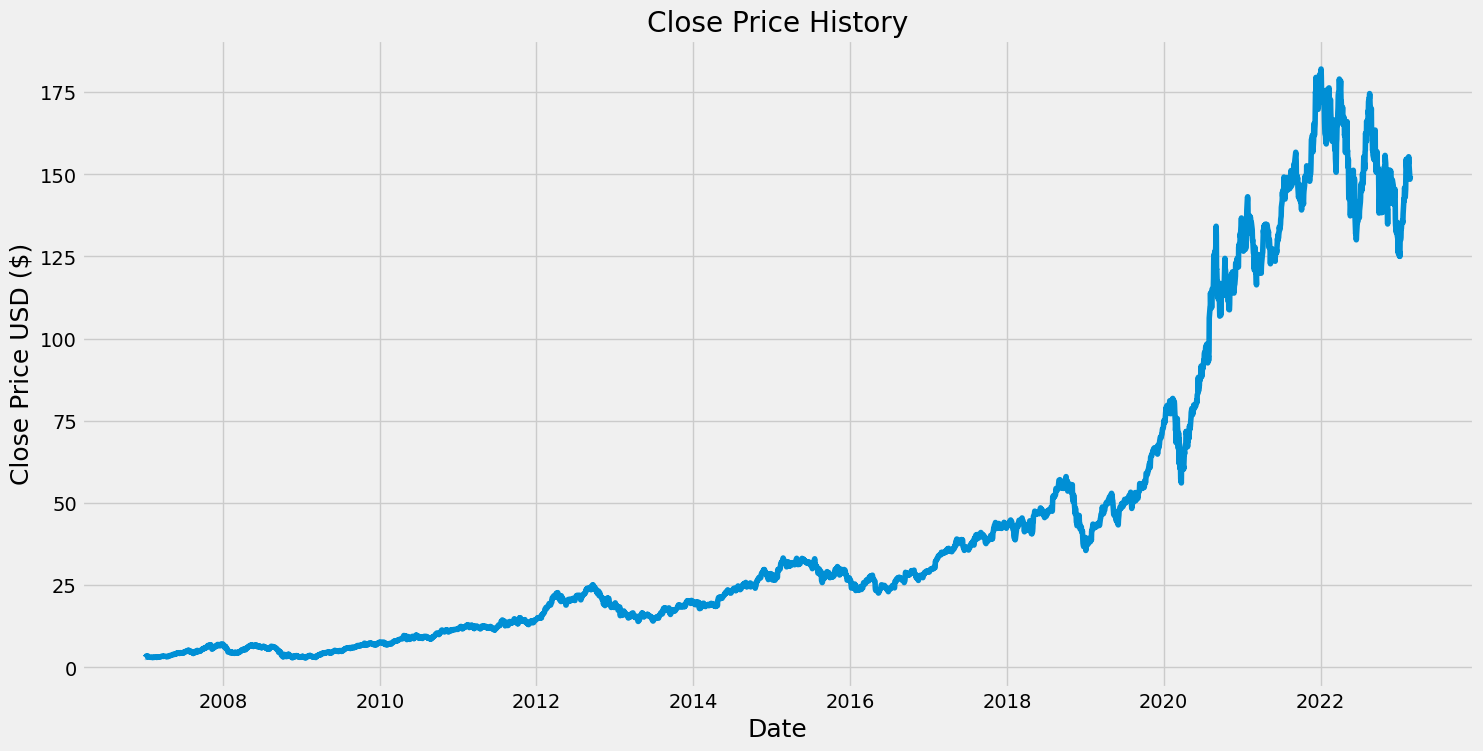

In [20]:
plt.figure(figsize=(16,9))
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [22]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,3.081786,3.092143,2.925000,2.992857,2.547275,1238319600
2007-01-04,3.001786,3.069643,2.993571,3.059286,2.603815,847260400
2007-01-05,3.063214,3.078571,3.014286,3.037500,2.585272,834741600
2007-01-08,3.070000,3.090357,3.045714,3.052500,2.598039,797106800
2007-01-09,3.087500,3.320714,3.041071,3.306071,2.813858,3349298400


In [23]:
# create dataframe for "Close" column

data = df.filter(['Close'])

#Convert dataframe to numpy array

dataset = data.values

# Obtain rows to train the model on

training_data_len = math.ceil(len(dataset)* .8)

training_data_len

3252

In [24]:
# scaling according to the need

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00111596],
       [0.00148663],
       [0.00136506],
       ...,
       [0.81290852],
       [0.81530789],
       [0.81804195]])

In [34]:
# create training dataset
# scaled training dataset

train_data = scaled_data[0:training_data_len,:]

# split data into x_train and y_train

x_train = []
y_train = []

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00111596, 0.00148663, 0.00136506, 0.00144876, 0.00286364,
       0.00374646, 0.00350732, 0.00327217, 0.00376638, 0.00333793,
       0.00216617, 0.00205258, 0.00171181, 0.0014946 , 0.00169388,
       0.0016042 , 0.00143083, 0.00154243, 0.0014647 , 0.00150058,
       0.00130329, 0.00130528, 0.00114386, 0.00118571, 0.00158427,
       0.00159025, 0.00101035, 0.00133119, 0.00129532, 0.00141489,
       0.00139695, 0.00132122, 0.00153445, 0.00219207, 0.00225385,
       0.00216617, 0.00205457, 0.00114187, 0.00127738, 0.00176562,
       0.00143681, 0.00161815, 0.0019908 , 0.00189714, 0.00195294,
       0.00194696, 0.00232559, 0.00203265, 0.0023515 , 0.00226581,
       0.00226979, 0.00257668, 0.00264643, 0.00312271, 0.00314064,
       0.00305296, 0.00351728, 0.00343957, 0.00299716, 0.00309879])]
[0.002931399391199704]



In [35]:
# convert the x tarin and y train to numpy array

x_train, y_train = np.array(x_train), np.array(y_train)

In [37]:
# reshape the data for LSTM model
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(3192, 60, 1)

In [38]:
# build LSTM model

model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [39]:
# compile the model

model.compile(optimizer='adam',loss='mean_squared_error')

In [40]:
# train the model

model.fit(x_train,y_train,batch_size=1,epochs=1)

3192/3192 [==============================] - 83s 24ms/step - loss: 1.4043e-04


In [41]:
# create testing dataset
# create new array containing scaled values from index 3192

test_data = scaled_data[training_data_len - 60:, :]

#Create the data sets x_test and y_test

x_test=[]
y_test = dataset[training_data_len:, :]

for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [42]:
# Convert the data to numpy array 

x_test = np.array(x_test)

In [44]:
# reshape the data for LSTM model

x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [48]:
# Get the model predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

26/26 [==============================] - 1s 20ms/step


In [49]:
# Get RMSE value - lower the value better the model performance 

rmse = np.sqrt(np.mean(predictions-y_test)**2)

In [50]:
rmse

2.6147282652079764

C:\Users\pnzee\AppData\Local\Temp\ipykernel_15936\1569024447.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid[ 'Predictions'] = predictions


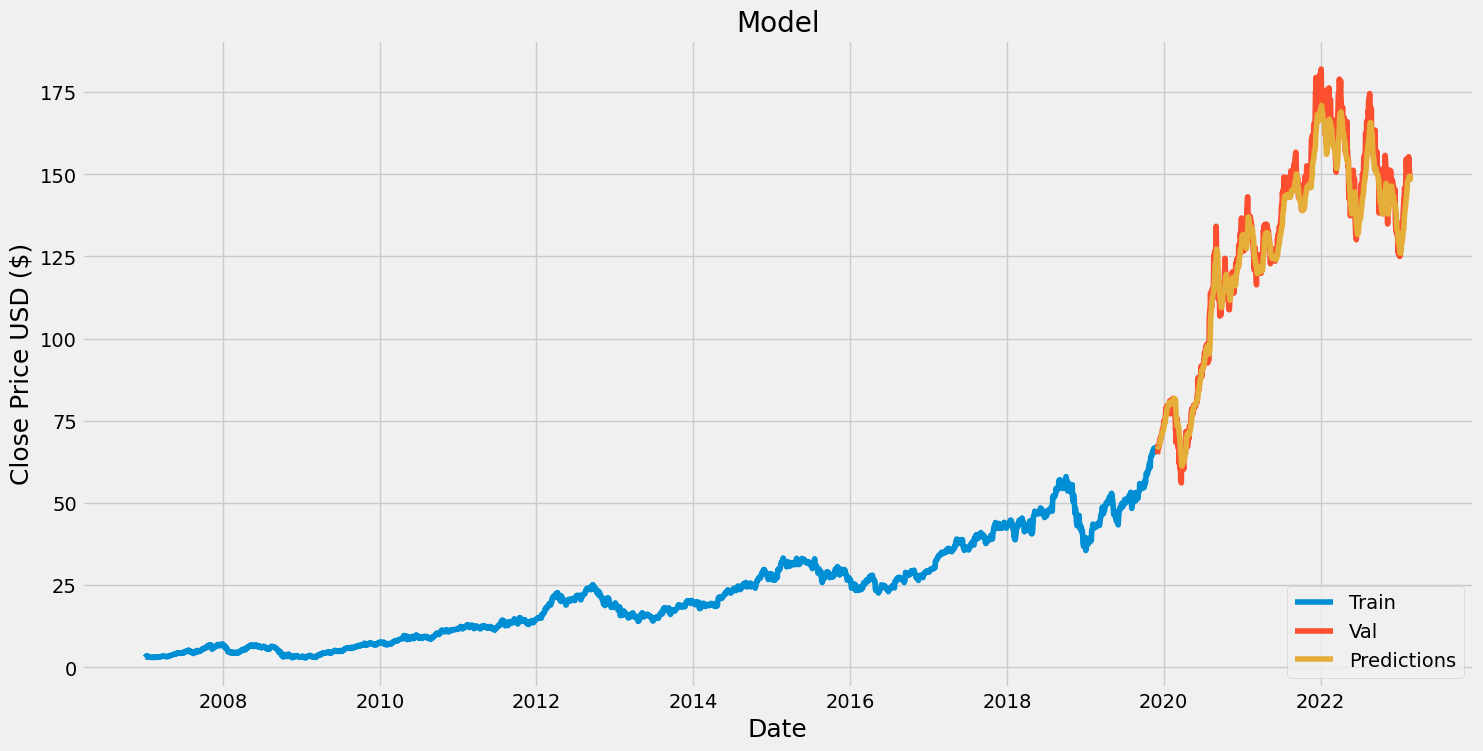

In [51]:
#Plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid[ 'Predictions'] = predictions

#Visualize the data

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train ['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend (['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [52]:
valid

,Close,Predictions
Date,,
2019-12-03,64.862503,67.385139
2019-12-04,65.434998,67.224579
2019-12-05,66.394997,67.054024
2019-12-06,67.677498,67.013718
2019-12-09,66.730003,67.201279
...,...,...
2023-02-16,153.710007,149.055740
2023-02-17,152.550003,149.327515
2023-02-21,148.479996,149.345993


In [ ]:
df = web.DataReader('AAPL','2007-01-01', '2023-03-10')

In [78]:
#Get the quote
apple_quote = web.DataReader('AAPL',start_date, end_date)
#Create a new dataframe
new_df=apple_quote.filter (['Close'])

#Get last 60 day closing price values and convert the dataframe to array
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1

last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

#Append teh past 60 days

X_test.append(last_60_days_scaled)

#Convert the X_test data set to a numpy array

X_test = np.array(X_test)

#Reshape the data

X_test= np.reshape(X_test, (X_test.shape [0], X_test.shape[1], 1))

#Get the predicted scaled price

pred_price = model.predict(X_test)

#undo the scaling

pred_price = scaler.inverse_transform(pred_price)

print("Predicted price will be",pred_price)


[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 65ms/step
Predicted price will be [[147.983]]
